# Alunos:
# Gabriel Gustavo de Souza
# Breno Pereira Goes
# João Pedro Carvalho Albino
# Nicolas Quintanilha
---





In [1]:
%matplotlib inline


Treinando um classificador:


Sobre os dados
----------------

Em geral, quando você precisa lidar com dados de imagem, texto, áudio ou vídeo,
você pode usar pacotes python padrão que carregam dados em uma matriz numpy.
Então você pode converter esse array em uma Tensor.

- Para imagens, pacotes como Pillow, OpenCV são úteis
- Para áudio, pacotes como scipy
- Para texto, carregamento bruto baseado em Python ou Cython ou NLTK e


Especificamente para a visão computacional, criamos um pacote chamado
 torchvision, que possui carregadores de dados para conjuntos de dados comuns, como Imagenet, CIFAR10, MNIST, etc. e transformadores de dados para imagens, a saber, `` torchvision.datasets`` e `` torch.utils.data.DataLoader``.

Isso oferece uma enorme conveniência e evita a gravação de código padrão.

Para este tutorial, usaremos o conjunto de dados CIFAR10.
Possui as classes: "avião", "automóvel", "pássaro", "gato", "cervo",
"Cachorro", "sapo", "cavalo", "navio", "caminhão". As imagens no CIFAR-10 são de
tamanho 3x32x32, ou seja, imagens em cores de 3 canais com tamanho de 32x32 pixels.


.. figure:: /_static/img/cifar10.png
   :alt: cifar10

   cifar10


Treinando um classificador de imagens:
----------------------------

Realizaremos as seguintes etapas em ordem:

1. Carregue e normalize os conjuntos de dados de treinamento e teste do CIFAR10 usando
    `` visão da tocha``
2. Definir uma rede neural de convolução
3. Defina uma função de perda
4. Treine a rede nos dados de treinamento
5. Teste a rede nos dados de teste

1. Carregamento e normalização do CIFAR10
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Usando `` torchvision``, é extremamente fácil carregar o CIFAR10.

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

A saída dos conjuntos de dados da visão da tocha são imagens PILImage do intervalo [0, 1]. Nós os transformamos em tensores de faixa normalizada [-1, 1].

In [3]:
# Transformações de dados para o conjunto CIFAR-10
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Carrega o conjunto de treinamento CIFAR-10
trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform
)

# Cria um DataLoader para o conjunto de treinamento
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

# Carrega o conjunto de teste CIFAR-10
testset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform
)

# Cria um DataLoader para o conjunto de teste
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True, num_workers=2)

# Classes possíveis no conjunto de dados
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


100%|██████████| 170498071/170498071 [00:03<00:00, 42999451.64it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Vamos ver algumas imagens só por diversão

 frog   cat   cat plane


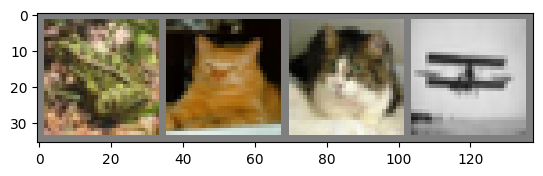

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Função para mostrar uma imagem
def imshow(img):
    img = img / 2 + 0.5  # Desfaz a normalização
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))

# Obtém algumas imagens de treinamento aleatórias
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Mostra as imagens e rótulos correspondentes
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

2. Definir uma rede neural de convolução ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Copie a rede neural antes e modifique-a para capturar imagens de 3 canais (em vez de imagens de 1 canal, conforme definido).



In [6]:
import torch.nn as nn
import torch.nn.functional as F

# Classe da rede neural modificada
class ModifiedNet(nn.Module):
    def __init__(self):
        super(ModifiedNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)  # Camada de convolução 1
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)  # Camada de convolução 2
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)  # Camada de convolução 3
        self.pool = nn.MaxPool2d(2, 2)  # Camada de pooling
        self.fc1 = nn.Linear(128 * 4 * 4, 256)  # Camada totalmente conectada 1
        self.fc2 = nn.Linear(256, 10)  # Camada totalmente conectada 2

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Cria uma instância da rede neural modificada
net = ModifiedNet()


3. Definir uma função de perda e otimizador ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

4. Train the network
^^^^^^^^^^^^^^^^^^^^

Aqui é quando os pesos começam a ser otimizados:



In [9]:
# Treinamento da rede neural
for epoch in range(5):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 200 == 0:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')


Epoch 1, Loss: 1.2440277036948502


KeyboardInterrupt: ignored

5. Testando a rede em dados de teste:
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Treinamos a rede por 2 épocas. Temos que checar se ela aprendeu:



GroundTruth:  horse truck   car  frog


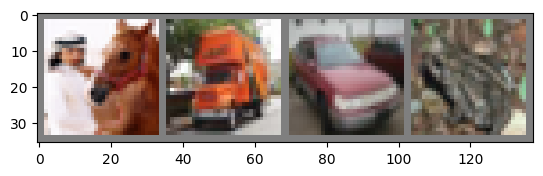

In [ ]:
# Teste da rede neural
dataiter = iter(testloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


Ok, agora vamos ver o que a rede neural pensa que esses exemplos acima são:

In [ ]:
outputs = net(images)

As saídas são energias para as 10 classes. Quanto maior a energia de uma classe, mais a rede pensa que a imagem é da classe específica. Então, vamos obter o índice da energia mais alta:

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat truck   car  frog
